# <u>**Forest Cover Type Prediction DSB-2023-v2**</u>

*The provided dataset has a variety of cartographic variables on four wilderness areas (Rawah (1), Neota (2), Comanche Peak (3) & Cache la Poudre (4)) located in the Roosevelt National Forest of Northern Colorado. The aim is to develop a model to predict the forest cover type (Spruce/Fir, Lodgepole Pine, Ponderosa Pine, Cottonwood/Willow, Aspen, Douglas-fir & Krummholz) only based on cartographic variables (no remotely sensed data).*

## <u>**Exploratory Data Analysis**</u>
*The purpose of this file is to visualize and interpret the data in addition to cleaning it before proceeding with trying different models to complete the given task.*

-> This Notebook's Exploratory Data Analysis approach will be divided into the following parts:
- Loading the Data with Pandas
- EDA on the Original Dataset
- Data Preperation & Cleaning

---
---

In [4]:
import pandas as pd
import numpy as np

## <u>**Loading the Data with Pandas:**</u>

In [5]:
df = pd.read_csv("../Data/train.csv")

In [6]:
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,242642,2881,130,22,210,54,1020,250,221,88,...,0,0,0,0,0,0,0,0,0,1
1,309891,3005,351,14,242,-16,1371,194,215,159,...,0,0,0,0,0,0,0,0,0,1
2,287847,3226,63,14,618,2,1092,232,210,107,...,0,0,0,0,0,0,0,0,0,1
3,516307,3298,317,8,661,60,752,198,233,174,...,0,0,0,0,0,0,0,0,0,1
4,124860,3080,35,6,175,26,3705,219,227,144,...,0,0,0,0,0,0,0,0,0,1


---
---

## <u>**Data Preparation & Cleaning:**</u>

- First we check the dataset for missing values:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

-> From the above output, we notice that all the 56 features of our dataset have 15120 entries, so we can conclude that there a no missing values in our dataset.

- Next we look at the number of unique values in each feature:

In [8]:
df.nunique(axis=0)

Id                                    15120
Elevation                              1676
Aspect                                  361
Slope                                    51
Horizontal_Distance_To_Hydrology        397
Vertical_Distance_To_Hydrology          433
Horizontal_Distance_To_Roadways        3274
Hillshade_9am                           176
Hillshade_Noon                          140
Hillshade_3pm                           248
Horizontal_Distance_To_Fire_Points     2764
Wilderness_Area1                          2
Wilderness_Area2                          2
Wilderness_Area3                          2
Wilderness_Area4                          2
Soil_Type1                                2
Soil_Type2                                2
Soil_Type3                                2
Soil_Type4                                2
Soil_Type5                                2
Soil_Type6                                2
Soil_Type7                                2
Soil_Type8                      

-> Looking at the previous cell, we start by dropping the Id column from the dataset since its not part of our features:

In [9]:
df.drop(['Id'], axis=1, inplace=True)

-> Additionally, to get an idea on the composition of our dataset and facilitate the feature engineering job later on, we look into the types of features we have (numerical or categorical). By looking at the given dataset description, we have:

- <u>List of numerical variables (**10 in total**)</u>: Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Horizontal_Distance_To_Fire_Points, Hillshade_9am, Hillshade_Noon, Hillshade_3pm

- <u>List of categorical variables (**44 in total** - excluding the target variable Cover_Type)</u>: Soil_Type(1-40) & Wilderness_Area(1-4)

In [10]:
numerical_variables = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", 
                       "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", 
                       "Horizontal_Distance_To_Fire_Points", "Hillshade_9am", 
                       "Hillshade_Noon", "Hillshade_3pm"]

categorical_variables = ["Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4", 
                         "Soil_Type1", "Soil_Type2", "Soil_Type3", "Soil_Type4", "Soil_Type5", "Soil_Type6", 
                         "Soil_Type7", "Soil_Type8", "Soil_Type9", "Soil_Type10", "Soil_Type11", "Soil_Type12", 
                         "Soil_Type13", "Soil_Type14", "Soil_Type15", "Soil_Type16", "Soil_Type17", "Soil_Type18", 
                         "Soil_Type19", "Soil_Type20", "Soil_Type21", "Soil_Type22", "Soil_Type23", "Soil_Type24", 
                         "Soil_Type25", "Soil_Type26", "Soil_Type27", "Soil_Type28", "Soil_Type29", "Soil_Type30",  
                         "Soil_Type31", "Soil_Type32", "Soil_Type33", "Soil_Type34", "Soil_Type35", "Soil_Type36", 
                         "Soil_Type37", "Soil_Type38", "Soil_Type39", "Soil_Type40"]

--- 
---

## <u>**EDA on the Numerical Variables:**</u>

- We start by plotting the frequencies of the different numerical variables we have to quickly analyze their distributions and look for potentially important information:

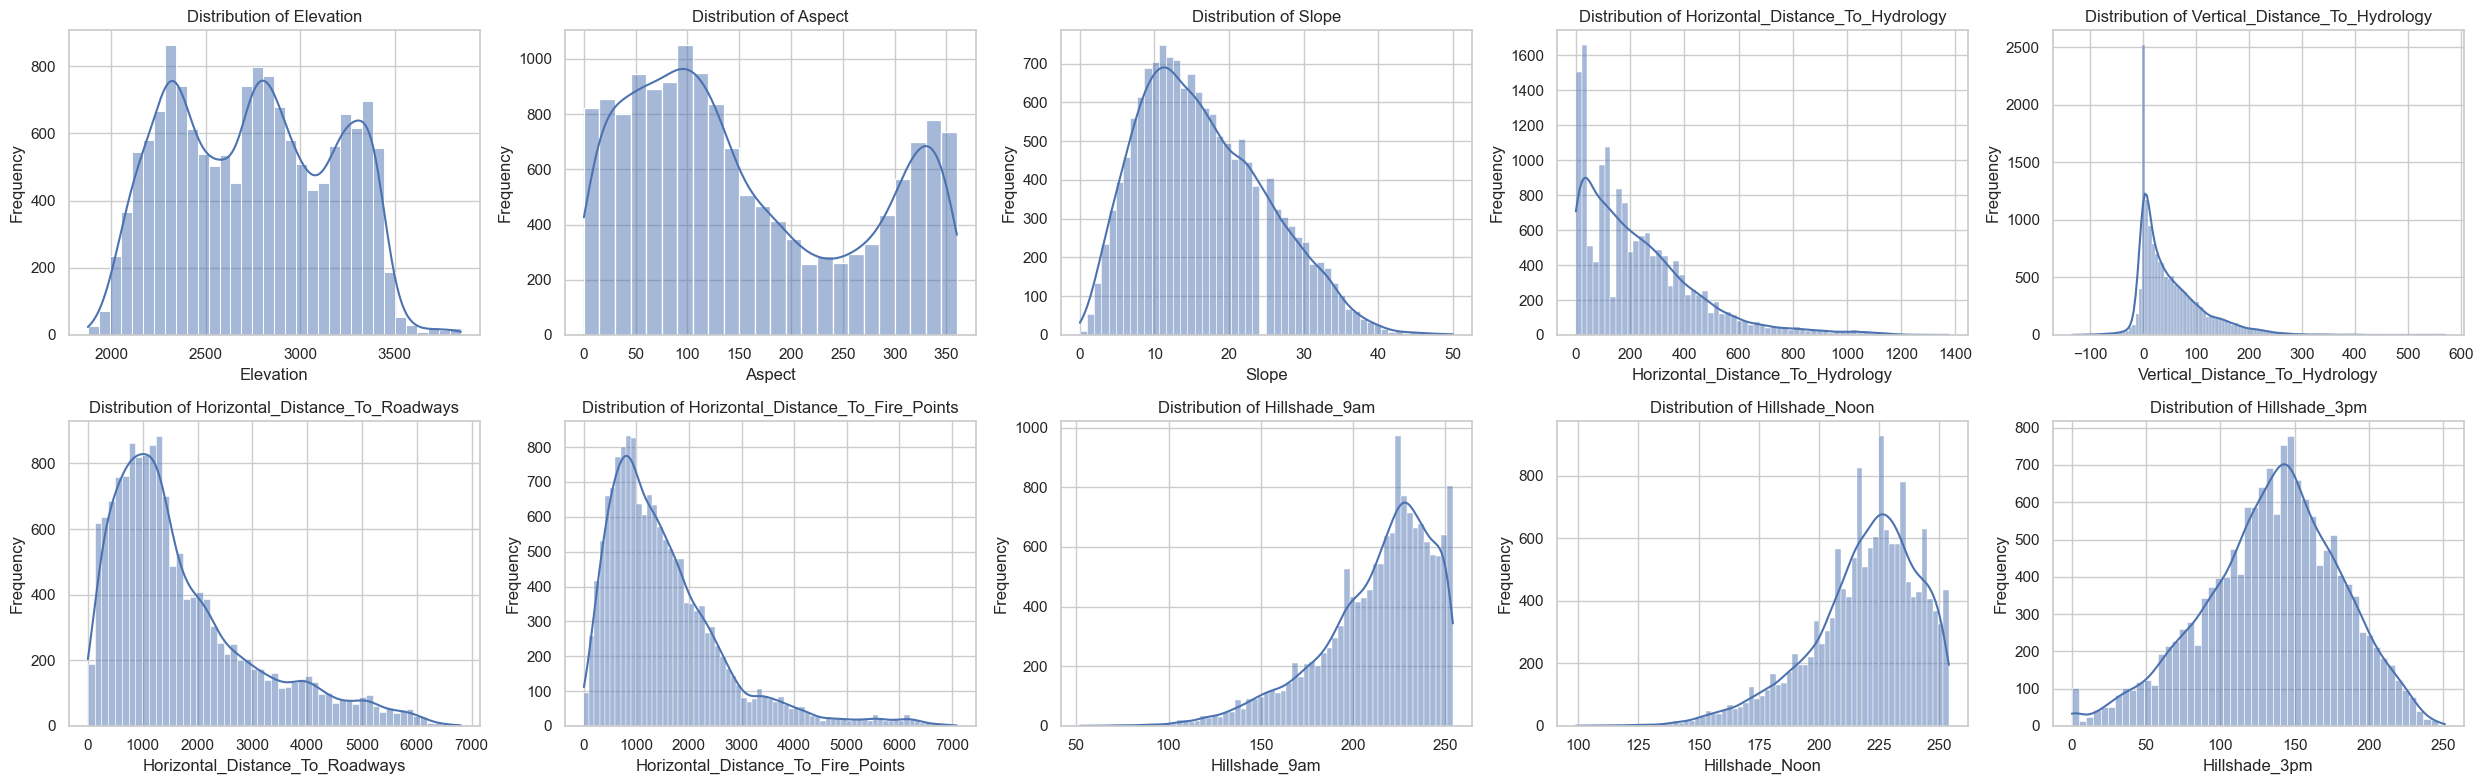

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

n_cols = 5
n_rows = int(np.ceil(len(numerical_variables) / n_cols))

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numerical_variables):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


-> We can conclude the following from the outputed histograms we have above:

-The **Elevation histogram** appears to have a relatively even distribution with three visible peaks, suggesting that there may be different groups (corresponding to different ranges of elevation) that can be distinguished whithin this variable.

-The **Aspect histogram** also shows a somewhat even distribution, with a slight drought from around 150 to 300. This might indicate relatively even exposure in all directions with a slight preference towards north and south-facing aspects.

-The **Slope histogram** shows a right-skewed distribution, indicating that most of the area has a little to no incline with fewer areas having steep slopes.

-The **Horizontal Distance to Hydrology histogram** also has a right skewed distribution. We can conclude from this histogram that most observations are near a water source but that there a still a few areas that are much farther away from water.

-The **Vertical Distance to Hydrology histogram** has a very similar right skewed distribution that implies the same conclusions as for the Horizontal Distance to Hydrology histogram. We could consider merging these two features later on since they seem correlated and they both represent the distance to hydrology.

-The **Horizontal Distance to Roadways histogram** also shows a right-skewed distribution, implying that many observations are relatively close to roadways. From the graph we can still see that there is still a range of observations extending to areas much farther from roadways.

-The **Horizontal Distance to Fire Points histogram**, similarly to the distances to hydrology and roadways, is right-skewed. Most of the areas are closer to fire points, but there are still some that are quite far away.

-The **Hillshade_9am and Hillshade_Noon histograms** both seem left-skewed. This indicates that most areas are highly shaded in the morning and at noon, with fewer areas receiving no sunlight (we notice that in the Hillshade_Noon graph, more and more areas are receiving sunlight). The **Hillshade_3pm histogram** shows a distribution that is relatively centered, implying that more and more areas are receiving more sunlight towards the early afternoon.

- To check some of the conclusions we made with the histograms & to analyze the outliers in the distributions of our numerical variables, we proceed by plotting the boxplots for the numerical variables:

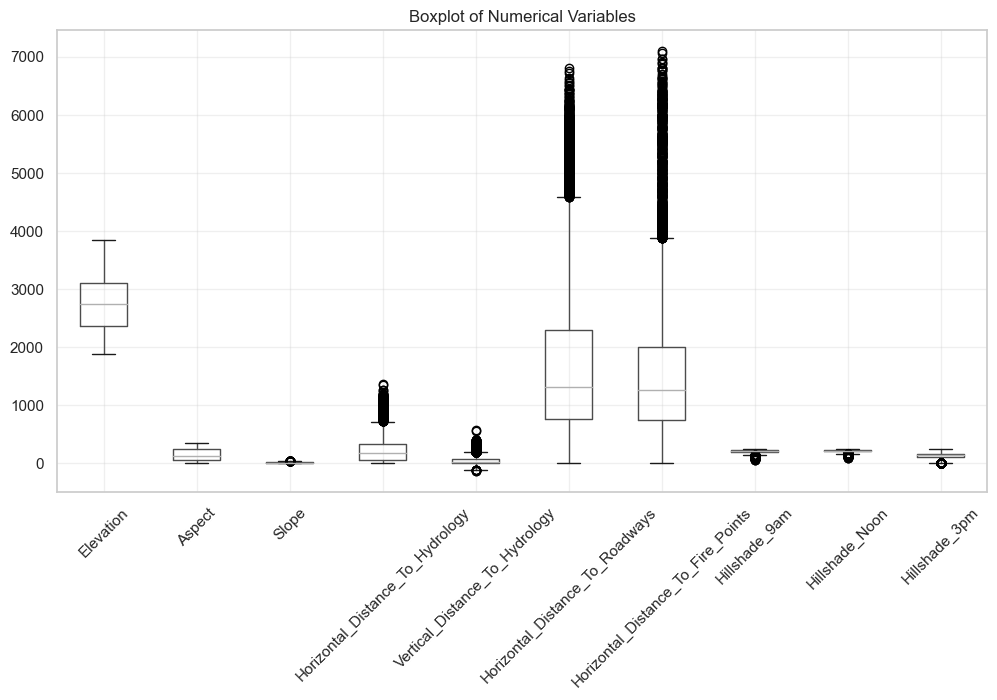

In [12]:
plt.figure(figsize=(12, 6))
df[numerical_variables].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Variables')
plt.grid(True, alpha=0.3)
plt.show()

-> From the above boxplots, we notice a high number of outliers for the Vertical Distance to Hydrology and the different Horizontal Distances to Hydrology, Roadways and Fire Points (with more extreme outliers for Hydrology and Roadways). This indicates that while most of our population is clustered close to hydrology, roadways and fire points, there is still a (relatively small) part of our population that is isolated from these points.

-> For the Hillshade indices (9am, noon and 3pm), the number of outliers is minimal, siggesting that during the morning and afternoon, most areas receive a consistent amount of sunlight with very few exceptions.

- Finally, let's build a correlation heatmap to analyze to what extent our variables are correlated and whether we haveto act on it:

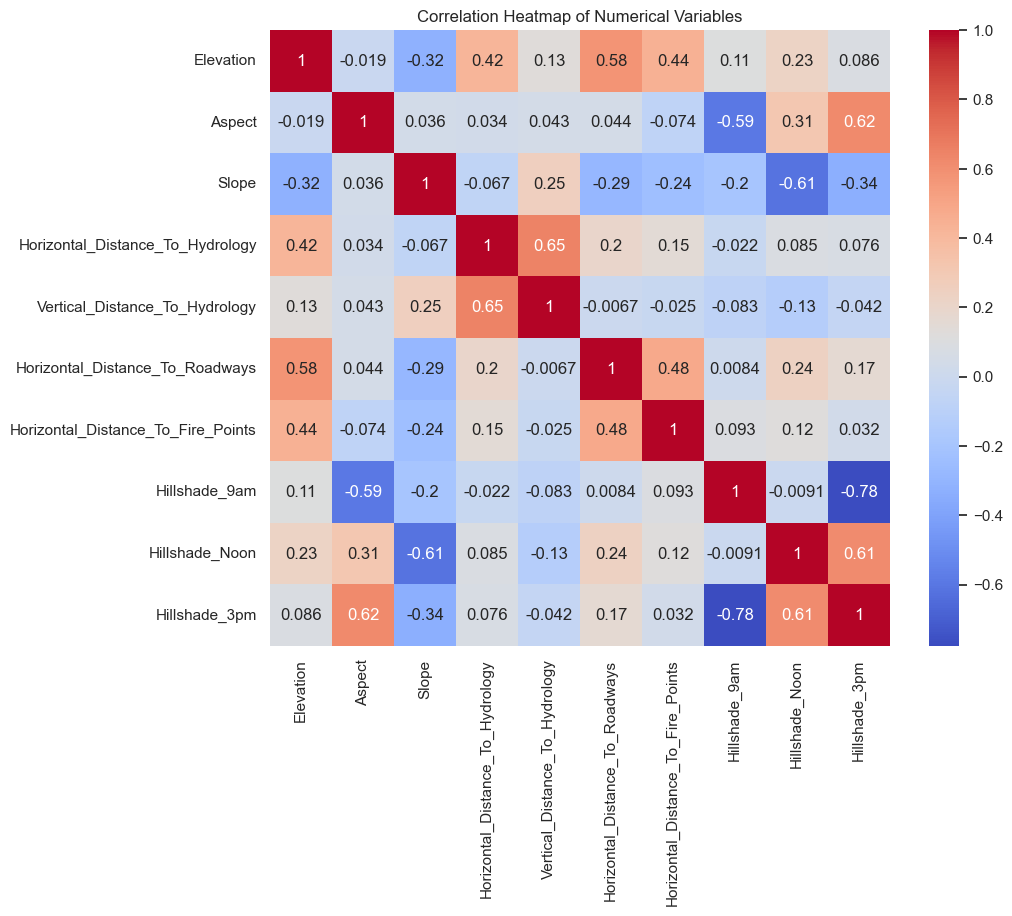

In [13]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_variables].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

-> From the above correlation heatmap, we can confirm the high positive correlation between Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology (0.65 in the above figure). The strong relationship between these two features may include redundancies in our model and since these two variables are correlated, we should consider merging them into one variable for our analysis.

-> We also notice a negative correlation between Hillshade_9am and Aspect, a positive correlation between Hillshade_3pm and Aspect and a poistive correlation between Hillshade_Noon and Hillshade_3pm. These correlations are expected because the amount of sunlight received is related to the Aspect. We can also potentially consider doing some feature engineering to the variables before training our model.

---
---

## <u>**EDA on the target variable:**</u>

- We start again by plotting the distribution of the target variable:

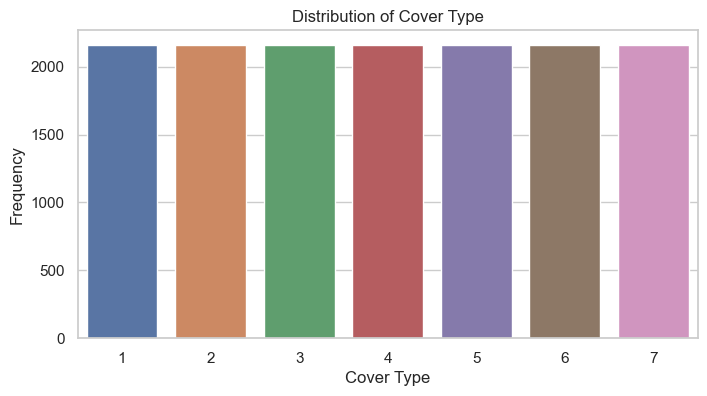

In [14]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Cover_Type')
plt.title('Distribution of Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Frequency')
plt.show()

-> We notice that the target varaible is evenly distributed among all the 7 cover types.

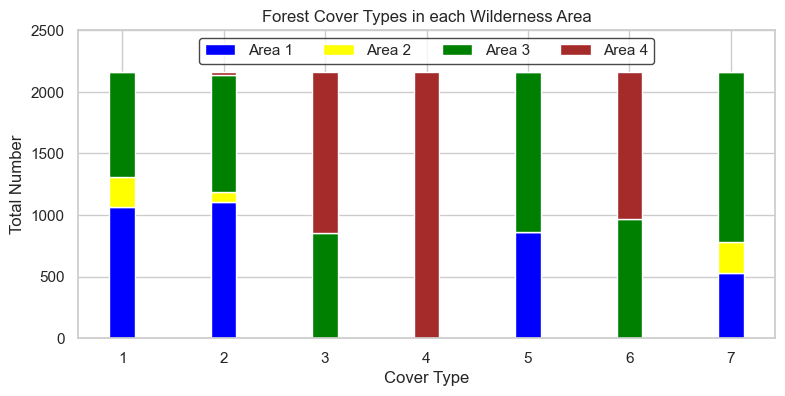

In [15]:
area_1_counts = np.asarray(df.groupby(["Cover_Type"]).sum()["Wilderness_Area1"])
area_2_counts = np.asarray(df.groupby(["Cover_Type"]).sum()["Wilderness_Area2"])
area_3_counts = np.asarray(df.groupby(["Cover_Type"]).sum()["Wilderness_Area3"])
area_4_counts = np.asarray(df.groupby(["Cover_Type"]).sum()["Wilderness_Area4"])

plt.figure(figsize=(9, 4))
p1 = plt.bar(range(1,8), area_1_counts, width=0.25, color='blue', label="Area 1")
p2 = plt.bar(range(1,8), area_2_counts, width=0.25, bottom=area_1_counts, color='yellow', label="Area 2")
p3 = plt.bar(range(1,8), area_3_counts, width=0.25, bottom=area_1_counts+area_2_counts, color='green', label="Area 3")
p4 = plt.bar(range(1,8), area_4_counts, width=0.25, bottom=area_1_counts+area_2_counts+area_3_counts, color='brown', label="Area 4")
plt.ylim([0, 2500])
plt.legend(ncol=4, loc="upper center", frameon=True, edgecolor='k')
plt.xlabel("Cover Type", fontsize=12)
plt.ylabel("Total Number", fontsize=12)
plt.title("Forest Cover Types in each Wilderness Area", fontsize=12)
plt.show()

---
---

## <u>**Feature Engineering:**</u>

- Creating a new merged variable from the horizontal and vertical distances to hydrology (taking the Euclidian distance) & dropping the original columns:

In [16]:
df['Distance_To_Hydrology'] = np.sqrt(df['Horizontal_Distance_To_Hydrology']**2 + df['Vertical_Distance_To_Hydrology']**2)
df.drop(['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], axis=1, inplace=True)

In [17]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Distance_To_Hydrology
0,2881,130,22,1020,250,221,88,342,1,0,...,0,0,0,0,0,0,0,0,1,216.831732
1,3005,351,14,1371,194,215,159,842,0,0,...,0,0,0,0,0,0,0,0,1,242.528349
2,3226,63,14,1092,232,210,107,2018,1,0,...,0,0,0,0,0,0,0,0,1,618.003236
3,3298,317,8,752,198,233,174,1248,0,1,...,0,0,0,0,0,0,0,0,1,663.717560
4,3080,35,6,3705,219,227,144,2673,1,0,...,0,0,0,0,0,0,0,0,1,176.920886


---
---